# AI예측 해커톤
- 심장 질환 예측

1. train.csv : 학습 데이터
id: 데이터 고유 id
age: 나이
sex: 성별 (여자 = 0, 남자 = 1)
cp: 가슴 통증(chest pain) 종류
0 : asymptomatic 무증상
1 : atypical angina 일반적이지 않은 협심증
2 : non-anginal pain 협심증이 아닌 통증
3 : typical angina 일반적인 협심증
trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
restecg: (resting electrocardiographic) 휴식 중 심전도 결과
0: showing probable or definite left ventricular hypertrophy by Estes' criteria
1: 정상
2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
thalach: (maximum heart rate achieved) 최대 심박수
exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
0: downsloping 하강
1: flat 평탄
2: upsloping 상승
ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개)
Null 값은 숫자 4로 인코딩됨
thal: thalassemia 지중해빈혈 여부
0 = Null
1 = normal 정상
2 = fixed defect 고정 결함
3 = reversable defect 가역 결함
target: 심장 질환 진단 여부
0: < 50% diameter narrowing
1: > 50% diameter narrowing


2. test.csv : 테스트 데이터
id: 데이터 고유 id
age: 나이
sex: 성별 (여자 = 0, 남자 = 1)
cp: 가슴 통증(chest pain) 종류
trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
restecg: (resting electrocardiographic) 휴식 중 심전도 결과
thalach: (maximum heart rate achieved) 최대 심박수
exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개)
thal: thalassemia 지중해빈혈 여부


3. sample_submissoin.csv : 제출 양식
id: 데이터 고유 id
target: 심장 질환 진단 여부




### [주제]
심장 질환 유무를 예측하는 AI 알고리즘 개발



### [설명]
환자의 나이, 콜레스테롤 수치 등의 정보를 바탕으로 심장 질환 유무를 예측하는 AI 모델을 개발해야 합니다.

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/sample_submission.csv')

### 데이터 확인

- 데이터 이상치 확인
- test셋에서 ca값 오류 발견 -> 수정

In [45]:
train

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
147,148,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
148,149,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
149,150,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [ ]:
train.describe()
# 눈에 띄는 이상치는 보이지 않음

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,43.734045,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,1.000000,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,76.000000,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,113.500000,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,151.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        151 non-null    int64  
 1   age       151 non-null    int64  
 2   sex       151 non-null    int64  
 3   cp        151 non-null    int64  
 4   trestbps  151 non-null    int64  
 5   chol      151 non-null    int64  
 6   fbs       151 non-null    int64  
 7   restecg   151 non-null    int64  
 8   thalach   151 non-null    int64  
 9   exang     151 non-null    int64  
 10  oldpeak   151 non-null    float64
 11  slope     151 non-null    int64  
 12  ca        151 non-null    int64  
 13  thal      151 non-null    int64  
 14  target    151 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 17.8 KB


In [ ]:
test.describe()
# ca( 형광 투시로 확인된 주요 혈관 수 (0~3 개)) 이지만 최대값이 4인 부분 발견 -> 3으로 치환

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,54.236842,0.684211,0.868421,131.217105,247.986842,0.138158,0.546053,148.671053,0.328947,1.101974,1.421053,0.855263,2.309211
std,44.022721,9.282710,0.466366,1.001219,17.210392,47.059071,0.346206,0.537825,22.368313,0.471384,1.231564,0.592741,1.106321,0.622253
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.750000,46.000000,0.000000,0.000000,120.000000,213.750000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,76.500000,56.000000,1.000000,0.000000,130.000000,242.500000,0.000000,1.000000,151.500000,0.000000,0.750000,1.000000,0.000000,2.000000
75%,114.250000,61.000000,1.000000,2.000000,140.000000,282.000000,0.000000,1.000000,164.250000,1.000000,1.800000,2.000000,1.250000,3.000000
max,152.000000,76.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [ ]:
test['ca'].value_counts()
# ca가 4로 나온 값은 5개 -> 3으로 변환

ca
0    80
1    34
2    23
3    10
4     5
Name: count, dtype: int64

In [ ]:
test.loc[test['ca'] == 4, 'ca'] = 3

In [ ]:
test['ca'].value_counts()

ca
0    80
1    34
2    23
3    15
Name: count, dtype: int64

## 로지스틱 모델 학습 및 예측

- 독립변수와 종속변수 설정
- 로지스틱 회귀 모델

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

x_train = train.drop(['id', 'target'], axis = 1) # 종속변수 제거
y_train = train['target']  # 종속변수

x_test = test.drop('id', axis = 1)

# 스케일링(표준화)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train )
x_test_scaled = scaler.transform(x_test)

# 스케일링된 데이터프레임 생성
columns = x_train.columns
x_train = pd.DataFrame(x_train_scaled, columns=columns)
x_test = pd.DataFrame(x_test_scaled, columns=columns)

x_train  = sm.add_constant(x_train ) # 상수항 추가
x_test = sm.add_constant(x_test) # 상수항 추가
x_train

,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.0,-0.168640,0.682656,0.887021,-0.113897,-0.846549,2.300362,-0.994066,0.058612,-0.693103,0.206190,-2.158717,-0.659316,-0.527951
1,1.0,-0.281315,0.682656,1.836950,1.118560,0.952353,2.300362,0.955336,1.170264,-0.693103,0.206190,-0.591572,-0.659316,1.132895
2,1.0,-0.055965,0.682656,-0.062909,3.359390,0.685189,-0.434714,-0.994066,1.897112,-0.693103,-0.902462,0.975574,0.434714,1.132895
3,1.0,-1.070043,-1.464866,-1.012839,0.334270,-0.151924,-0.434714,-0.994066,0.058612,1.442786,-0.717686,-0.591572,-0.659316,-0.527951
4,1.0,-2.196797,0.682656,-0.062909,-0.562063,-0.935604,-0.434714,0.955336,0.999240,-0.693103,-0.902462,0.975574,-0.659316,-0.527951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1.0,-0.506666,0.682656,0.887021,0.446311,-0.205356,-0.434714,0.955336,0.528926,-0.693103,-0.348136,-0.591572,0.434714,1.132895
147,1.0,-0.393991,0.682656,0.887021,-2.130644,-0.312222,-0.434714,0.955336,0.144124,1.442786,-0.902462,0.975574,0.434714,1.132895
148,1.0,1.634166,0.682656,1.836950,1.566726,-0.187545,2.300362,-0.994066,-0.839260,-0.693103,-0.810074,-0.591572,0.434714,-0.527951
149,1.0,-0.957368,0.682656,-1.012839,-0.674104,0.079618,-0.434714,-0.994066,-0.283434,-0.693103,-0.163361,0.975574,-0.659316,1.132895


In [ ]:
#검증 데이터 준비
train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(train_x, train_y)
y_pred = model.predict(val_x)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy_diabets_DT =  accuracy_score(val_y, y_pred)
precision_diabets_DT =  precision_score(val_y, y_pred)
recall_diabets_DT =  recall_score(val_y, y_pred)
f1_score_diabets_DT =  f1_score(val_y, y_pred)

display(f"Accuracy:{accuracy_diabets_DT}")
display(f"precision:{precision_diabets_DT}")
display(f"recall: {recall_diabets_DT}")
display(f"f1_score: {f1_score_diabets_DT}")

# Confusion Matrix 얻기
cf_mat = confusion_matrix(val_y, y_pred)
display("Confusion Matrix\n", cf_mat)

'Accuracy:0.8387096774193549'

'precision:0.8666666666666667'

'recall: 0.8125'

'f1_score: 0.8387096774193549'

'Confusion Matrix\n'

array([[13,  2],
       [ 3, 13]])

모델은 양성(Positive)과 음성(Negative) 예측에서 각각 13개의 TP와 TN을 갖고 있으며, 2개의 FP와 3개의 FN을 가지고 있습니다. 이는 모델이 양성과 음성을 비교적 잘 구분하는 것을 의미합니다.

In [ ]:
predict = model.predict(x_test)
predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
submission['target'] = predict

submission.to_csv('submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

### 예측 확률을 높이기 위한 랜덤 포레스트 모델 적용


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [56]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/sample_submission.csv')

In [57]:
X_train = train.drop(columns=["target", "id"])
y_train = train["target"]

In [58]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [50]:
# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# 예측 수행
y_pred = model.predict(X_test)

#성능 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7419354838709677
Precision: 0.7
Recall: 0.875
F1 Score: 0.7777777777777777
Confusion Matrix:
[[ 9  6]
 [ 2 14]]


모델 성능이 로지스틱이 우월함 피쳐 중요도 확인을 통해서 모델 재학습

In [53]:
# 피처 중요도 확인
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

     Feature  Importance
11        ca    0.159640
9    oldpeak    0.129155
2         cp    0.123350
7    thalach    0.111610
12      thal    0.111269
0        age    0.083116
3   trestbps    0.068912
4       chol    0.067671
8      exang    0.048827
10     slope    0.048167
1        sex    0.024330
6    restecg    0.012436
5        fbs    0.011517


In [60]:
# 중요한 피처만 선택
important_features = importance_df[importance_df['Importance'] > 0.1]['Feature']
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

In [61]:
# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_important, y_train)

# 예측 수행
y_pred = model.predict(X_test_important)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.6774193548387096
Precision: 0.65
Recall: 0.8125
F1 Score: 0.7222222222222223
Confusion Matrix:
[[ 8  7]
 [ 3 13]]


오히려 성능이 저하됨

In [62]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_important, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")

# 최적의 하이퍼파라미터로 모델 평가
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_important)

# 성능 평가
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")
print(f"Confusion Matrix:\n{conf_matrix_best}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7096774193548387
Precision: 0.6666666666666666
Recall: 0.875
F1 Score: 0.7567567567567567
Confusion Matrix:
[[ 8  7]
 [ 2 14]]


KeyError: '[0, 4, 1, 3] not in index'

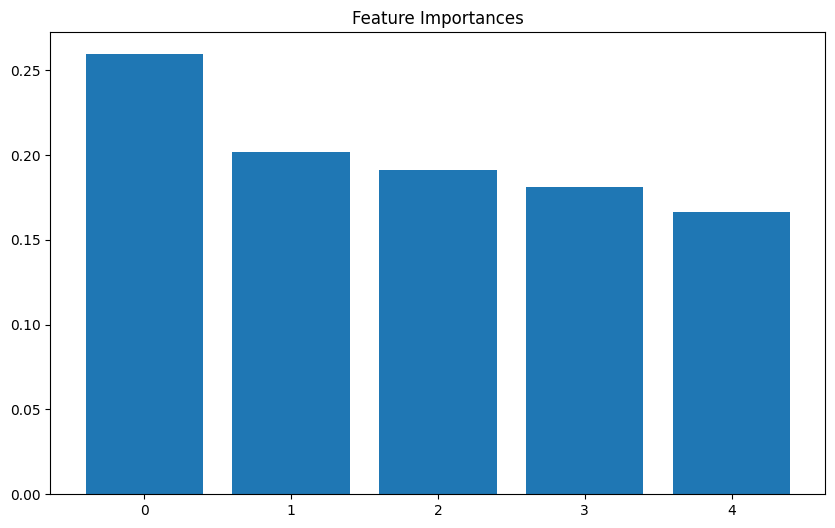

In [63]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = important_features

# 피처 중요도 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_important.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_important.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train_important.shape[1]])
plt.show()

처음 진행했던 분류모델인 로지스틱 회귀에서 더 디벨롭 진행

- 상관관계를 파악해서 중요 피쳐 파악
- 피처에 범위를 설정해 구간별 분류
- standardscaler를 이용한 train 데이터 표준화
- labelencoder를 활용한 범주형 데이터 인코딩
- 로지스틱 회귀 모델 정의
- 모델 학습 및 예측

In [64]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/zerobase/해커톤/dataset/sample_submission.csv')

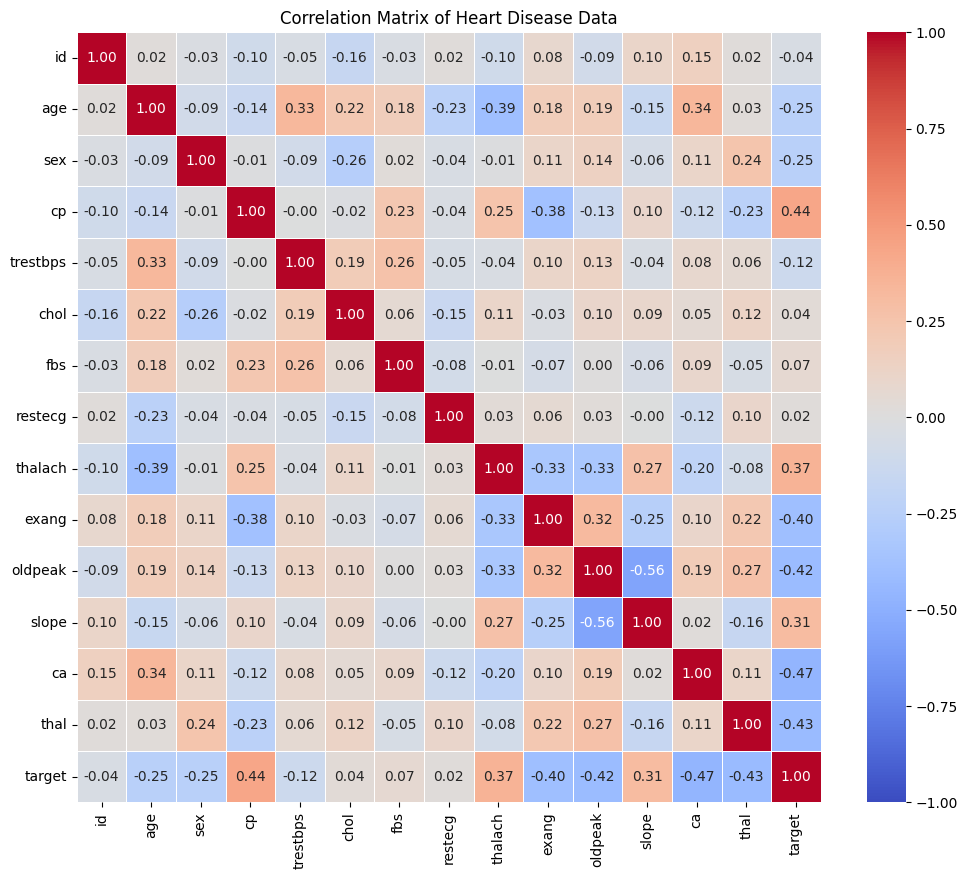

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = train.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Data')
plt.show()

ca  -0.47 약한 음의 상관관계 </br>
thal -0.43 약한 음의 상관관계 </br>
cp 0.44 약한 양의 상관관계

In [104]:
x_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']

x_test = test.drop('id', axis = 1)

In [119]:
# 학습 데이터와 테스트 데이터 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [120]:
x_train['cp_cut'] = pd.cut(
    x_train['cp'],
    bins = [-2, 0,1.5,2],
    labels = ['A', 'B', 'C'],
    right = False
)

print(x_train['cp_cut'].value_counts(sort = False))

print('cp가 -2미만 : ',
    len(x_train[x_train['cp'] < 1]))
print('cp가 0이상 1.5미만인 값 : ',
    len(x_train[(x_train['cp'] >= 1) & (x_train['cp'] <1.5)]))
print('cp가 1.5이상인 값 : ',
    len(x_train[(x_train['cp'] >= 1.5) & (x_train['cp'] < 2)]))

x_test['cp_cut'] = pd.cut(
    x_test['cp'],
    bins = [-2, 0,1.5,2],
    labels = ['A', 'B', 'C'],
    right = False
)

print(x_test['cp_cut'].value_counts(sort = False))

print('cp가 -2 미만 : ',
    len(x_test[x_test['cp'] < 1]))
print('cp가 0이상 1.5미만인 값 : ',
    len(x_test[(x_test['cp'] >= 1) & (x_test['cp'] <1.5)]))
print('cp가 1.5이상인 값 : ',
    len(x_test[(x_test['cp'] >= 1.5) & (x_test['cp'] < 2)]))

cp_cut
A    41
B    48
C     0
Name: count, dtype: int64
cp가 -2미만 :  58
cp가 0이상 1.5미만인 값 :  31
cp가 1.5이상인 값 :  0
cp_cut
A    78
B    65
C     0
Name: count, dtype: int64
cp가 -2 미만 :  103
cp가 0이상 1.5미만인 값 :  40
cp가 1.5이상인 값 :  0


In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train.loc[:,'age':'thal'])
scaler.fit(x_test.loc[:,'age':'thal'])

StandardScaler()

In [122]:
scaled_train = scaler.transform(x_train.loc[:,'age':'thal'])
scaled_test = scaler.transform(x_test.loc[:,'age':'thal'])

sequential_features = scaler.feature_names_in_

for index, feature in enumerate(sequential_features):
    x_train[feature] = scaled_train[:,index]
    x_test[feature] = scaled_test[:,index]

train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_cut
0,1,-0.168640,0.682656,0.887021,-0.113897,-0.846549,2.300362,-0.994066,0.058612,-0.693103,0.206190,-2.158717,-0.659316,-0.527951,1,B
1,2,-0.281315,0.682656,1.836950,1.118560,0.952353,2.300362,0.955336,1.170264,-0.693103,0.206190,-0.591572,-0.659316,1.132895,1,C
2,3,-0.055965,0.682656,-0.062909,3.359390,0.685189,-0.434714,-0.994066,1.897112,-0.693103,-0.902462,0.975574,0.434714,1.132895,0,A
3,4,-1.070043,-1.464866,-1.012839,0.334270,-0.151924,-0.434714,-0.994066,0.058612,1.442786,-0.717686,-0.591572,-0.659316,-0.527951,1,A
4,5,-2.196797,0.682656,-0.062909,-0.562063,-0.935604,-0.434714,0.955336,0.999240,-0.693103,-0.902462,0.975574,-0.659316,-0.527951,1,A


In [123]:
x_train['cp_cut'].value_counts()

cp_cut
B    48
A    41
C     0
Name: count, dtype: int64

labelencoder 범주형 데이터 인코딩


In [124]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le = le.fit(x_train['cp_cut'])
x_train['cp_cut'] = le.transform(x_train['cp_cut'])

In [125]:
import numpy as np

for label in x_test['cp_cut']:
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

x_test['cp_cut'] = le.transform(x_test['cp_cut'])

In [126]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_cut
73,-0.025599,-1.471960,1.133937,-1.353476,0.405363,-0.400381,-1.018654,0.822125,-0.700140,-0.897733,0.979958,-0.775625,-0.498563,1
149,-0.890265,0.679366,-0.870231,-0.653918,0.021601,-0.400381,-1.018654,-0.209515,-0.700140,-0.246006,0.979958,-0.775625,1.113812,0
109,-0.349849,0.679366,2.136021,-0.362436,-0.745924,-0.400381,-1.018654,-1.061739,1.428286,0.242790,0.979958,0.131260,-0.498563,2
20,0.839068,0.679366,0.131853,-0.653918,0.703845,-0.400381,-1.018654,-2.048524,-0.700140,0.242790,-0.712697,0.131260,1.113812,1
131,0.839068,-1.471960,-0.870231,0.395419,0.981007,2.497618,0.846833,-1.913963,-0.700140,0.650120,-0.712697,1.945030,-0.498563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,-0.349849,0.679366,-0.870231,0.512012,1.087607,-0.400381,0.846833,1.091248,1.428286,0.405722,0.979958,-0.775625,1.113812,0
10,1.487567,0.679366,1.133937,2.843873,0.554604,2.497618,-1.018654,0.059608,1.428286,0.405722,-0.712697,-0.775625,1.113812,1
91,0.082485,-1.471960,-0.870231,2.843873,1.684571,-0.400381,2.712320,-1.420570,1.428286,1.872109,-0.712697,-0.775625,-0.498563,0
96,-0.133682,-1.471960,-0.870231,-0.070953,0.341403,-0.400381,-1.018654,-0.254369,-0.700140,-0.571870,-0.712697,-0.775625,-0.498563,0


In [127]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [128]:
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

In [129]:
# 성능 평가
accuracy_best = accuracy_score(y_val, y_pred)
precision_best = precision_score(y_val, y_pred)
recall_best = recall_score(y_val, y_pred)
f1_best = f1_score(y_val, y_pred)
conf_matrix_best = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")
print(f"Confusion Matrix:\n{conf_matrix_best}")


Accuracy: 0.75
Precision: 0.7222222222222222
Recall: 0.9285714285714286
F1 Score: 0.8125000000000001
Confusion Matrix:
[[ 5  5]
 [ 1 13]]


- 성능 평가 요약 </br>
모델은 재현율이 매우 높지만 정밀도가 상대적으로 낮습니다. 이는 모델이 양성 샘플을 많이 잡아내는 데 중점을 두고 있지만, 그 과정에서 많은 음성 샘플을 잘못된 양성으로 예측하고 있음을 나타냅니다. 즉, 양성 샘플을 놓치지 않으려는 경향이 강합니다.

In [131]:
# 정밀도와 재현율의 균형 맞추기
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_prob = model.predict_proba(x_val)[:, 1]

In [133]:
# 다양한 임계값에 대해 정밀도와 재현율 계산
precisions, recalls, thresholds = precision_recall_curve(y_val, y_prob)

In [134]:
# 임계값 계산
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]

In [136]:
# 선택한 임계값을 사용하여 최종 예측
y_pred_adjusted = (y_prob >= best_threshold).astype(int)

In [138]:
# 성능평가
accuracy_best = accuracy_score(y_val, y_pred_adjusted)
precision_best = precision_score(y_val, y_pred_adjusted)
recall_best = recall_score(y_val, y_pred_adjusted)
f1_best = f1_score(y_val, y_pred_adjusted)
conf_matrix_best = confusion_matrix(y_val, y_pred_adjusted)

print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")
print(f"Confusion Matrix:\n{conf_matrix_best}")

Accuracy: 0.875
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1 Score: 0.888888888888889
Confusion Matrix:
[[ 9  1]
 [ 2 12]]


오오오~ 높아졌다!!

In [139]:
# 테스트 세트에 대한 예측 확률 얻기
y_prob_test = model.predict_proba(x_test)[:, 1]

# 선택한 임계값을 사용하여 테스트 세트에 대한 최종 예측
y_pred_test_adjusted = (y_prob_test >= best_threshold).astype(int)

In [143]:
submission['target'] = y_prob_test

submission.to_csv('submission(1).csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')